Coefficients (Weights): [ 0.00993552 -0.01554713  0.0319442   0.97291198]
Bias (Intercept): 7.461254835976433


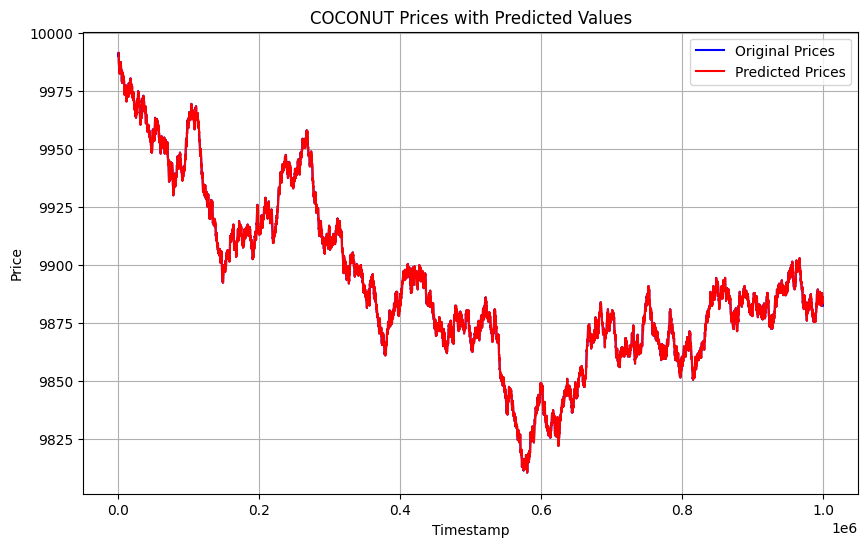

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv('../data/prices_round_4_day_3.csv', delimiter=';')

coconut_df = df[df['product'] == 'COCONUT']
coconut_df.head()
prices = coconut_df['mid_price'].tolist()
X = []
Y = []

window_size = 4
for i in range(len(prices) - window_size):
    window = prices[i:i+window_size]
    target = prices[i+window_size]
    X.append(window)
    Y.append(target)

model = LinearRegression()

model.fit(X, Y)

coefficients = model.coef_
bias = model.intercept_

print("Coefficients (Weights):", coefficients)
print("Bias (Intercept):", bias)

plt.figure(figsize=(10, 6))
plt.plot(coconut_df['timestamp'], coconut_df['mid_price'], label='Original Prices', color='blue')
plt.plot(coconut_df['timestamp'][window_size:], model.predict(X), label='Predicted Prices', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('COCONUT Prices with Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

Coefficients (Weights): [-0.00454066  0.01793017  0.03843331  0.94790327]
Bias (Intercept): 0.1717232477952848


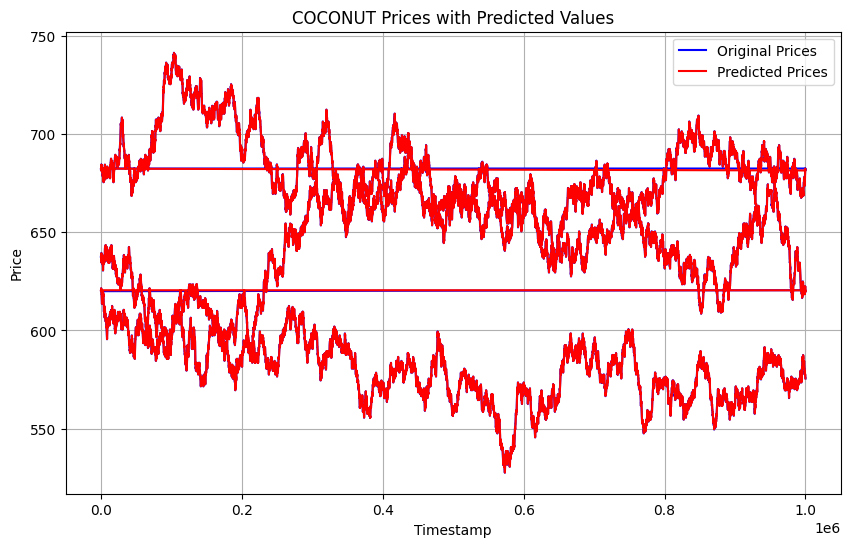

In [9]:
import numpy as np
coupon_df = df[df['product'] == 'COCONUT_COUPON']
coupon_df.head()
prices = coupon_df['mid_price'].tolist()
X = []
Y = []

window_size = 4
for i in range(len(prices) - window_size):
    window = prices[i:i+window_size]
    target = prices[i+window_size]
    X.append(window)
    Y.append(target)

model = LinearRegression()

model.fit(X, Y)

coefficients = model.coef_
bias = model.intercept_

print("Coefficients (Weights):", coefficients)
print("Bias (Intercept):", bias)

plt.figure(figsize=(10, 6))
plt.plot(coupon_df['timestamp'], coupon_df['mid_price'], label='Original Prices', color='blue')
plt.plot(coupon_df['timestamp'][window_size:], model.predict(X), label='Predicted Prices', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('COCONUT Prices with Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

Coefficients (Weights): [1.85647986]
Bias (Intercept): 8815.559326360317


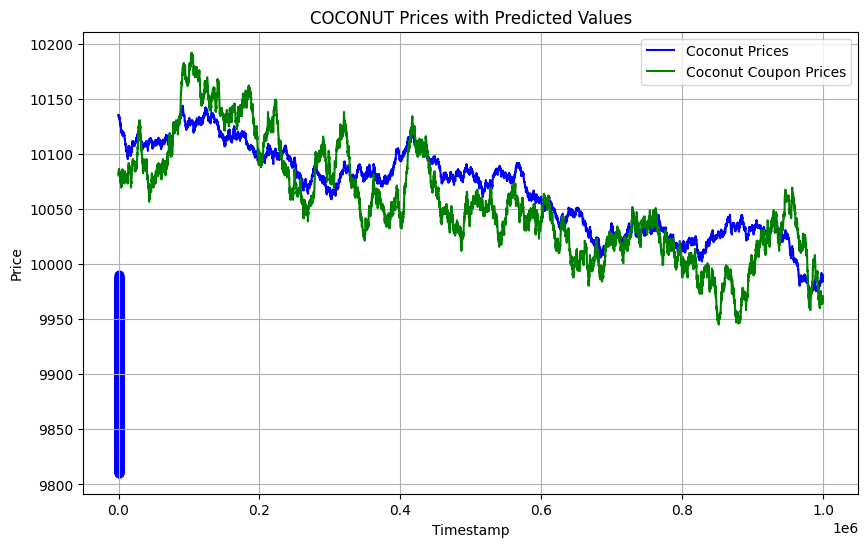

In [25]:
df3 = pd.read_csv('../data/prices_round_4_day_3.csv', delimiter=';')
df2 = pd.read_csv('../data/prices_round_4_day_2.csv', delimiter=';')
df1 = pd.read_csv('../data/prices_round_4_day_1.csv', delimiter=';')

df = pd.concat([df1, df2, df3])
df = df3

df_coconut = df[df['product'] == 'COCONUT']
df_coconut_coupon = df[df['product'] == 'COCONUT_COUPON']

coconut_prices = df_coconut['mid_price']
coconut_coupon_prices = df_coconut_coupon['mid_price']

X = []
Y = []

window_size = 5
for i in range(len(coconut_prices) - window_size):
    window = (coconut_coupon_prices[i:i+window_size]).mean()
    target = (coconut_prices[i:i+window_size]).mean()
    X.append(window)
    Y.append(target)

model = LinearRegression()


X = np.array(X).reshape(-1, 1)
model.fit(X, Y)

coefficients = model.coef_
bias = model.intercept_

print("Coefficients (Weights):", coefficients)  
print("Bias (Intercept):", bias)

df = pd.read_csv('../data/prices_round_4_day_2.csv', delimiter=';')
df_coconut = df[df['product'] == 'COCONUT']
df_coconut_coupon = df[df['product'] == 'COCONUT_COUPON']
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue')
plt.plot(df_coconut['timestamp'], df_coconut['mid_price'], label='Coconut Prices', color='blue')
plt.plot(df_coconut_coupon['timestamp'], df_coconut_coupon['mid_price'] * coefficients[0] + bias, label='Coconut Coupon Prices', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('COCONUT Prices with Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

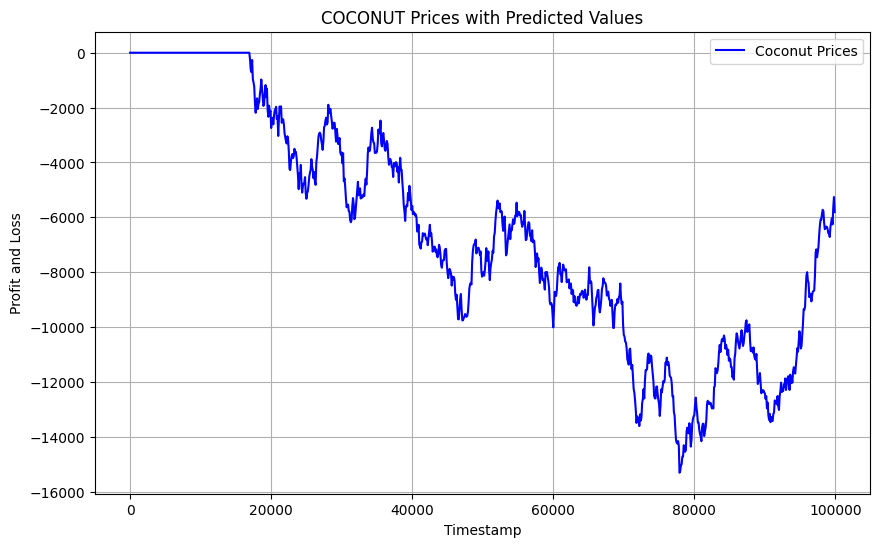

In [36]:
df = pd.read_csv('../data/0ec5182d-a4c4-47a1-abb1-59de1c39a181.csv', delimiter=';')

# df_coconut = df[df['product'] == 'COCONUT']
# df_coconut_coupon = df[df['product'] == 'COCONUT_COUPON']

# coconut_5_sma = df_coconut['mid_price'].rolling(window=5).mean()
# coconut_coupon_5_sma = df_coconut_coupon['mid_price'].rolling(window=5).mean() * coefficients[0] + bias 

# plt.figure(figsize=(10, 6))
# plt.plot(df_coconut['timestamp'], coconut_5_sma, label='Coconut 5 SMA', color='red')
# plt.plot(df_coconut_coupon['timestamp'], coconut_coupon_5_sma, label='Coconut Coupon 5 SMA', color='green')
# plt.xlabel('Timestamp')
# plt.ylabel('Price')
# plt.title('COCONUT Prices with Predicted Values')
# plt.legend()
# plt.grid(True)
# plt.show()

df_coconut = df[df['product'] == 'COCONUT']
plt.figure(figsize=(10, 6))
plt.plot(df_coconut['timestamp'], df_coconut['profit_and_loss'], label='Coconut Prices', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Profit and Loss')
plt.title('COCONUT Prices with Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

